In [1]:
import pandas as pd
import sys, warnings

In [2]:
sys.path.insert(0,'..')  ## add parent folder to path
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

In [3]:
from helpers import load_dataset

In [4]:
df = load_dataset(name='titanic')
df.set_index("PassengerId", inplace=True)
df.shape

c:\Users\dherrera\OneDrive - COOSALUD EPS-S\PERSONAL\LearnigDS-ML\Preprocessing
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


(891, 11)

In [5]:
target = "Survived"

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
for c in df:
    l = len(df[c].drop_duplicates())
    n = len(df[c].dropna().drop_duplicates())
    print(f"{c} - cardinality={l}, nulls={l!=n}")
    # , dict(df[c].value_counts())

Survived - cardinality=2, nulls=False
Pclass - cardinality=3, nulls=False
Name - cardinality=891, nulls=False
Sex - cardinality=2, nulls=False
Age - cardinality=89, nulls=True
SibSp - cardinality=7, nulls=False
Parch - cardinality=7, nulls=False
Ticket - cardinality=681, nulls=False
Fare - cardinality=248, nulls=False
Cabin - cardinality=148, nulls=True
Embarked - cardinality=4, nulls=True


In [8]:
data = df.copy()
data = data.drop(["Name","Ticket"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.00,1,0,7.25,NaN,S
2,1,1,female,38.00,1,0,71.28,C85,C
3,1,3,female,26.00,0,0,7.92,NaN,S
4,1,1,female,35.00,1,0,53.10,C123,S
5,0,3,male,35.00,0,0,8.05,NaN,S


In [9]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

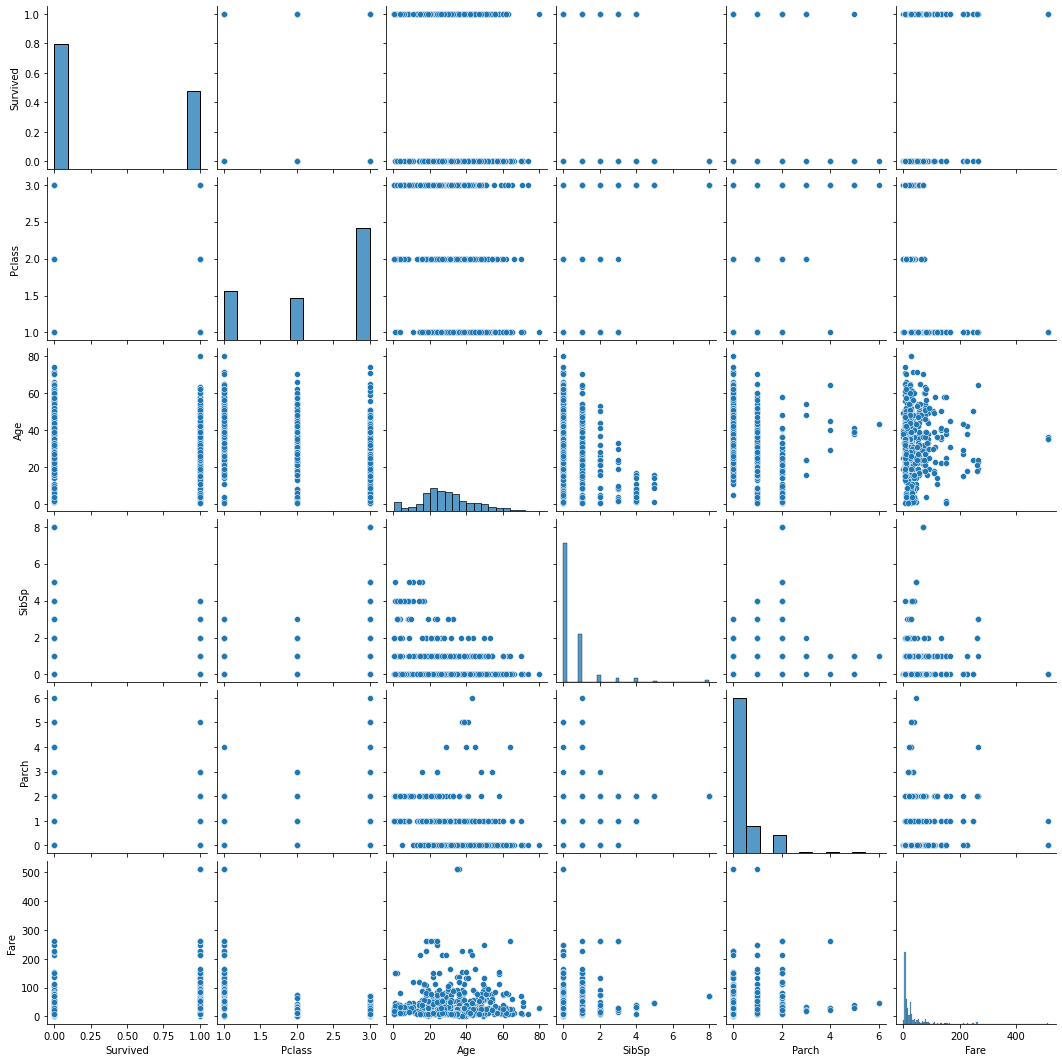

In [10]:
sns.pairplot(data)

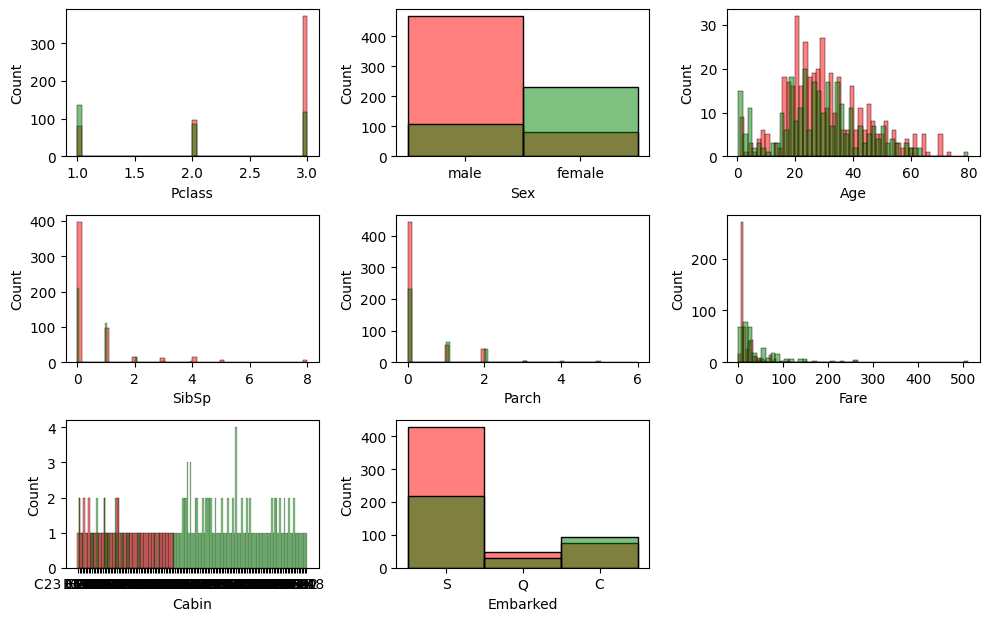

In [11]:
def plot_data_by_target(data, target):
    plt.figure(figsize=(10,10))
    grid = gridspec.GridSpec(5,3)
    for i,c in enumerate(data.drop(target,axis=1).columns):
        ax = plt.subplot(grid[i])
        sns.histplot(data=data[data[target]==0][c], alpha=0.5, color="r", bins=50)
        sns.histplot(data=data[data[target]==1][c], alpha=0.5, color="g", bins=50)

    plt.tight_layout()
    plt.show()
    return None
plot_data_by_target(data, target)

In [12]:
import re

In [13]:
data["Cabin"] = data["Cabin"].fillna("").apply(lambda x: re.findall(r'\w\d+', x)).str[0]
data["CabinType"] = data["Cabin"].str[0].fillna("NA")
data["Sex"] = data["Sex"].map({"female":1, "male":0}) # .value_counts(dropna=False)
filtro = data["Fare"]==0
data.loc[filtro,"Fare"] = None
data = data.drop("Cabin", axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType
PassengerId,,,,,,,,,
1,0,3,0,22.00,1,0,7.25,S,NA
2,1,1,1,38.00,1,0,71.28,C,C
3,1,3,1,26.00,0,0,7.92,S,NA
4,1,1,1,35.00,1,0,53.10,S,C
5,0,3,0,35.00,0,0,8.05,S,NA


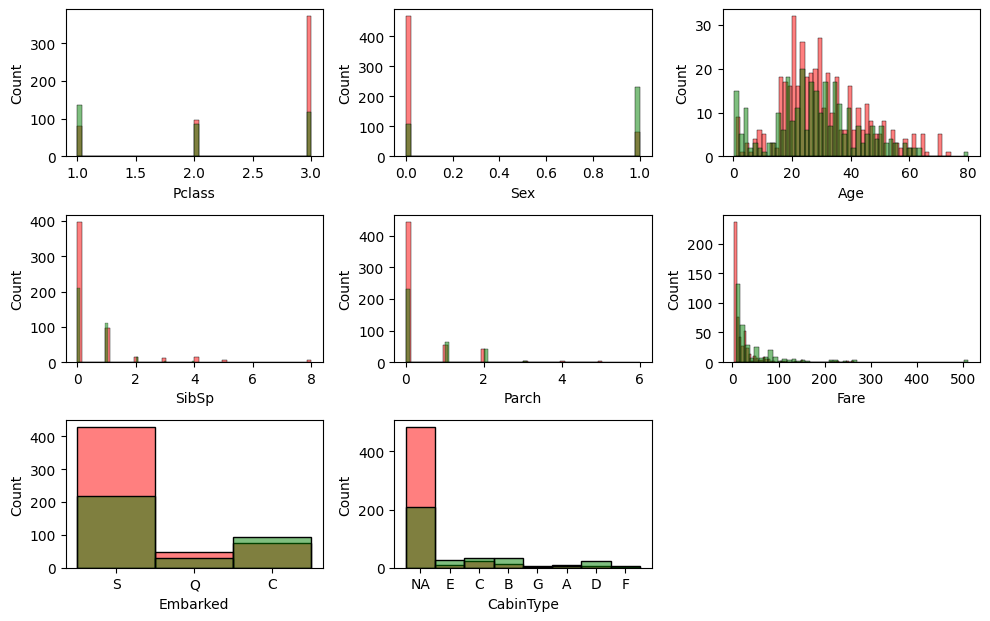

In [14]:
plot_data_by_target(data, target)

In [15]:
fare_fill = data.groupby(["CabinType"], dropna=False).agg(mean_fare=("Fare","mean"), std_fare=("Fare","std"), median_fare=("Fare","median"))
fare_fill = dict(fare_fill["median_fare"])
fare_fill

{'A': 37.55,
 'B': 80.0,
 'C': 83.475,
 'D': 69.30414999999999,
 'E': 38.5,
 'F': 26.0,
 'G': 10.4625,
 'NA': 11.1333}

In [16]:
filtro = data["Fare"].isnull()
filtro.value_counts()
data.loc[filtro, "Fare"] = data[filtro]["CabinType"].map(fare_fill)

data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
CabinType      0
dtype: int64

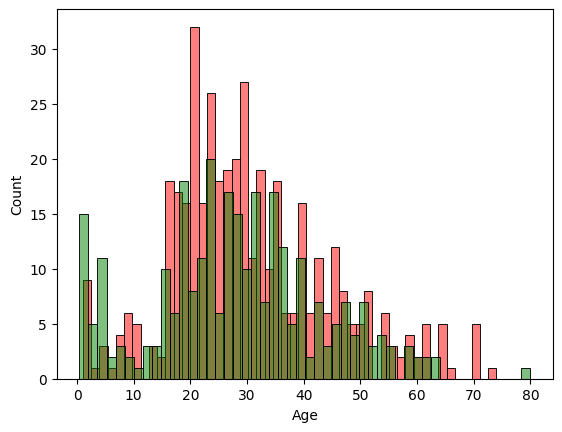

In [17]:
sns.histplot(data=data[data[target]==0]["Age"], alpha=0.5, color="r", bins=50)
sns.histplot(data=data[data[target]==1]["Age"], alpha=0.5, color="g", bins=50)
plt.show()

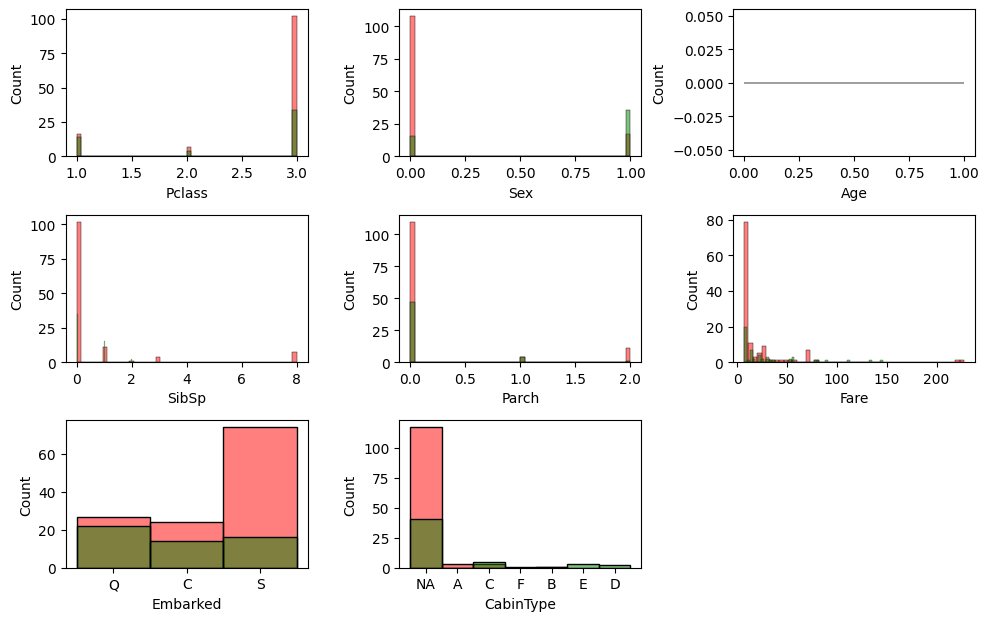

In [18]:
## distribucion de variables donde esta sin edad
plot_data_by_target(data[data["Age"].isnull()], target)

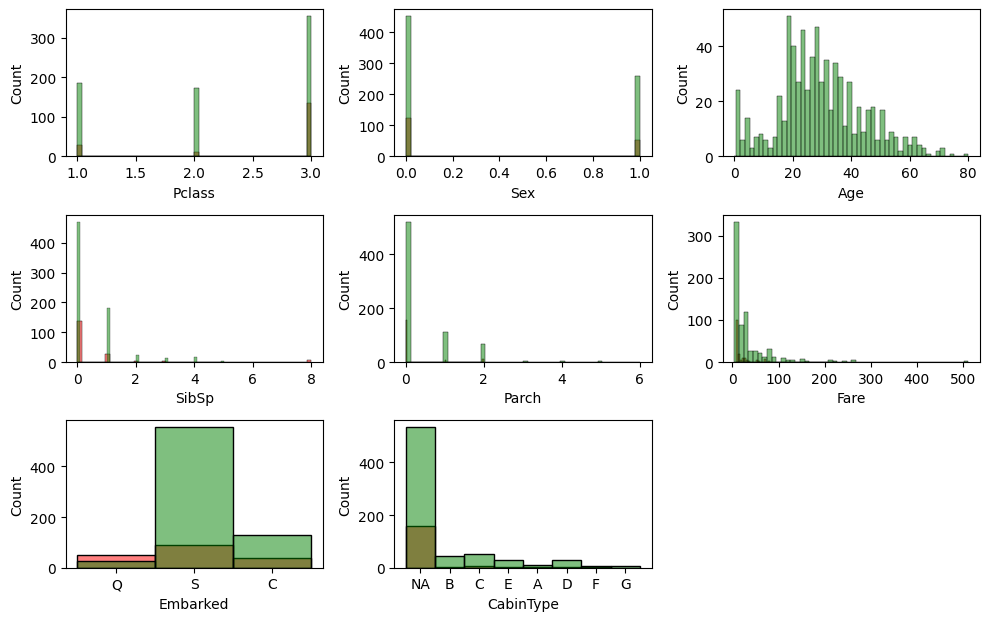

In [19]:
plt.figure(figsize=(10,10))
grid = gridspec.GridSpec(5,3)
for i,c in enumerate(data.drop(target,axis=1).columns):
    ax = plt.subplot(grid[i])
    sns.histplot(data=data[data["Age"].isnull()][c], alpha=0.5, color="r", bins=50, label="Nulo")
    sns.histplot(data=data[data["Age"].isnull()==False][c], alpha=0.5, color="g", bins=50, label="Edad")
plt.tight_layout()
plt.show()

In [70]:
data = data.dropna()
print(data.shape)
data.head()

(712, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType
PassengerId,,,,,,,,,
1,0,3,0,22.00,1,0,7.25,S,NA
2,1,1,1,38.00,1,0,71.28,C,C
3,1,3,1,26.00,0,0,7.92,S,NA
4,1,1,1,35.00,1,0,53.10,S,C
5,0,3,0,35.00,0,0,8.05,S,NA


## One hot encoding

In [33]:
cols = ["Embarked","CabinType"]
data_one_hot = pd.concat([
            data.drop(cols,axis=1)
            , pd.get_dummies(data.replace("NA",None)[["Embarked","CabinType"]], prefix_sep="__")    ## one hot encodign
        ], axis=1
    )
data_one_hot.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,CabinType__A,CabinType__B,CabinType__C,CabinType__D,CabinType__E,CabinType__F,CabinType__G
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,0,22.00,1,0,7.25,0,0,1,0,0,0,0,0,0,0
2,1,1,1,38.00,1,0,71.28,1,0,0,0,0,1,0,0,0,0
3,1,3,1,26.00,0,0,7.92,0,0,1,0,0,0,0,0,0,0
4,1,1,1,35.00,1,0,53.10,0,0,1,0,0,1,0,0,0,0
5,0,3,0,35.00,0,0,8.05,0,0,1,0,0,0,0,0,0,0


In [34]:
def make_xy(data, target, test_size):
    features = list(data.drop(target,axis=1).columns)

    X = data[features]
    y = data[target]

    print("X", X.shape, ", y", y.shape)

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    print("X_train=",X_train.shape, " , X_test=", X_test.shape, ", y_train=", y_train.shape, ", y_test",y_test.shape)

    return X, y, X_train, X_test, y_train, y_test

In [35]:
X, y, X_train, X_test, y_train, y_test = make_xy(data_one_hot, target, 0.3)

X (712, 16) , y (712,)
X_train= (498, 16)  , X_test= (214, 16) , y_train= (498,) , y_test (214,)


In [59]:
def make_scaled(X_train, X_test):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    scaler.fit(X_train, y_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    # X_train_scaled.describe().T

    return X_train_scaled, X_test_scaled

In [60]:
X_train_scaled, X_test_scaled = make_scaled(X_train, X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators=10000, random_state=123)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [63]:
from sklearn.metrics import classification_report

,precision,recall,f1-score,support
0,0.80,0.88,0.84,125.00
1,0.81,0.70,0.75,89.00
accuracy,0.80,0.80,0.80,0.80
macro avg,0.80,0.79,0.79,214.00
weighted avg,0.80,0.80,0.80,214.00


In [65]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.81,0.90,0.85,125.00
1,0.83,0.70,0.76,89.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.82,0.80,0.80,214.00
weighted avg,0.81,0.81,0.81,214.00


In [69]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.81,0.90,0.85,125.00
1,0.83,0.70,0.76,89.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.82,0.80,0.80,214.00
weighted avg,0.81,0.81,0.81,214.00


In [72]:
data["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [89]:
[(i,len(f"{i:b}")) for i in range(1,1000,100)]

[(1, 1),
 (101, 7),
 (201, 8),
 (301, 9),
 (401, 9),
 (501, 9),
 (601, 10),
 (701, 10),
 (801, 10),
 (901, 10)]

In [81]:
i = 3.20028
i

3.20028

In [86]:
i = 4


'100'

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [106]:
# data["CabinType"].value_counts().sort_index().reset_index()
# pd.DataFrame(encoder.fit_transform(data["CabinType"])).value_counts().sort_index().reset_index()


0     12
1     43
2     51
3     28
4     30
5      8
6      7
7    533
dtype: int64

In [108]:
pd.concat(
    [
        data["CabinType"].value_counts().reset_index()
        , pd.DataFrame(encoder.fit_transform(data["CabinType"])).value_counts()
]
, axis=1, ignore_index=True)

,0,1,2
0,NA,533.00,NaN
1,C,51.00,NaN
2,B,43.00,NaN
3,E,30.00,NaN
4,D,28.00,NaN
5,A,12.00,NaN
6,F,8.00,NaN
7,G,7.00,NaN
"(7,)",NaN,NaN,533.00
"(2,)",NaN,NaN,51.00
